# Pointilism usage examples

### Explanation
The module `pointillism` contains classes to build pointillized pictures with colors taken from a source image(s). The base class is `pointillize` and can load directories or single images, and includes the primary methods:
* `plotRecPoints()` plots rectangular arrays of circles of fixed radius
* `plotRandomPoints()` plots random circles of random radius
* `plotRandomPointsComplexity()` plots random circles with radius based on complexity of source image in that area

In addition, the subclass `pointillizeStack` contains methods for building a workflow of image manipulations and then saving gif animations of either the construction of the image or of the final result constructed repeatedly to produce a kind of fluid final picture. Currently only implemented to work on single images. Its subclass `pointillizePile` however is implemented to operate in serial on a large list of images and supports saving gifs in batches as well. 

In the future, support will be provided for loading movie files and saving out pointillized versions of them

### Samples
Some images and gifs I've produced can be found here: https://photos.app.goo.gl/SAQ1DMLrkVxoyjGB3

## Import class definitions

In [1]:
from pointillism import pointillize, pointillizeStack, pointillizePile

# Usage examples

## 1) Read image or directory of images, run routines to pointillize, and save result

images/IMG_0290.jpg


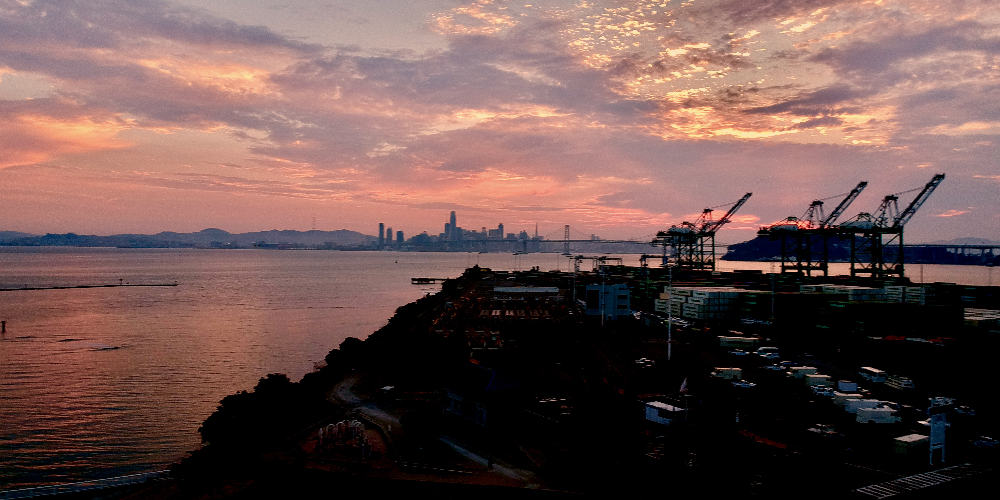

In [2]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0290.jpg', debug = True)

# Crop
point.crop_Y([1000,500], False)

# Display original
point.display(original=True)

In [3]:
# Plot rectangular grid of overlapping circles to fill canvas
point.plotRecPoints(step=40, r=40, fill=False)

# Plot many random points with size proportional to area complexity
point.plotRandomPointsComplexity(n=2e4, constant=0.01, power=1.0)  

plotRecPoints: 1 done...took 2.74 sec
plotRandomPointsComplexity: 1 done...took 17.44 sec


images/IMG_0290.jpg


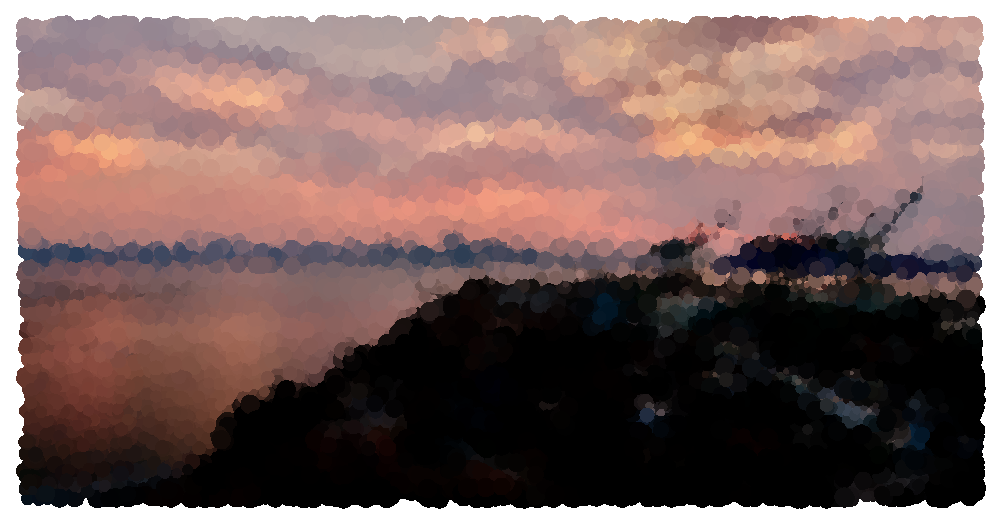

In [4]:
# Display and save
point.display()
point.save_out(location = 'images_out', suffix = 'basic test')

## 2) Build image stacks using `pointillizeStack` and save as gif of intermediate images

In [5]:
# Create instance
point = pointillizeStack(location='images/IMG_0290.jpg', debug = True, border = 0)

# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[25, 25, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e3,0.01,1.3],10)

# Build image stacks
point.build_stacks(n=1, save_steps=True)

crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


In [6]:
# Save
point.save_gif('gifs/animated_stacking.gif', step_duration=0.5)

In [7]:
# Display
from IPython.display import HTML
HTML('<img src="gifs/animated_stacking.gif">')

## 3) Build image stacks using `pointillizeStack` and save as gif of final images

In [8]:
# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[25, 25, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Build image stacks
point.build_stacks(n=10, save_steps=False)

Building image:  1 2 3 4 5 6 7 8 9 10 done


In [9]:
# Save
point.save_gif('gifs/animated_stacking_loop.gif', step_duration=0.1)

In [10]:
# Display
HTML('<img src="gifs/animated_stacking_loop.gif">')

## 4. Bulk image processing with `pointillizePile`

In [11]:
# Create instance on directory
point = pointillizePile(location='images_mini/', debug = True, border = 0)

### Images

In [12]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[960,540], False],1)
point.add_to_queue(point.plotRecPoints,[40, 40, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1],1)

# Run and save
point.run_pile_images(location = 'images_out_pile_mini', suffix = 'no border')

Batch processing image: 1 2 3 done


### Loop GIFs

In [13]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 40, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1],1)

# Run and save (gifs) in loop mode
point.run_pile_gifs(location = 'images_out_pile_mini', n=10, save_steps = False, step_duration = 0.1, suffix = 'loop')

1 Building image:  1 2 3 4 5 6 7 8 9 10 done
2 Building image:  1 2 3 4 5 6 7 8 9 10 done
3 Building image:  1 2 3 4 5 6 7 8 9 10 done


### Assembly gifs

In [14]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 40, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e3,0.01,1],10)

# Run and save (gifs) in assembly mode
point.run_pile_gifs(location = 'images_out_pile_mini', n=1, save_steps = True, step_duration = 0.5, suffix = 'assembly')

1 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
2 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
3 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


### Display
not currently implemented in `pointillizePile`, it's on the todo list :)

images_out_pile_mini/IMG_0093.jpg - no border.png


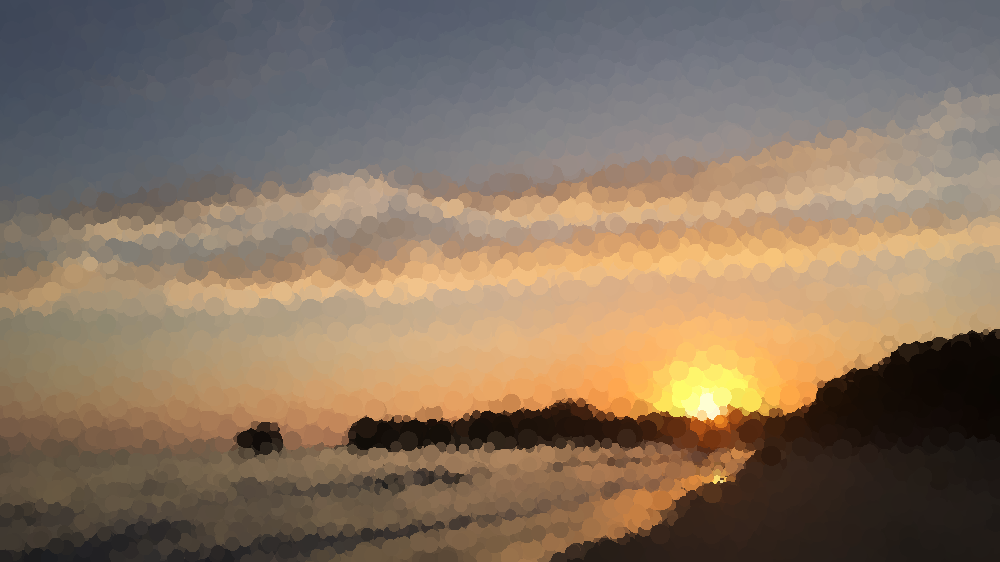

images_out_pile_mini/IMG_0116.jpg - no border.png


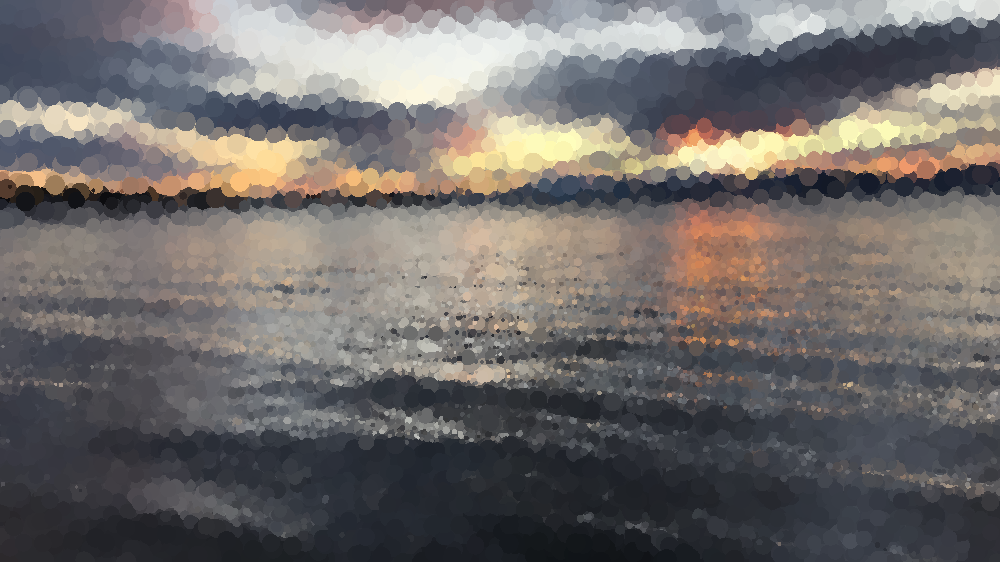

images_out_pile_mini/IMG_1261.jpg - no border.png


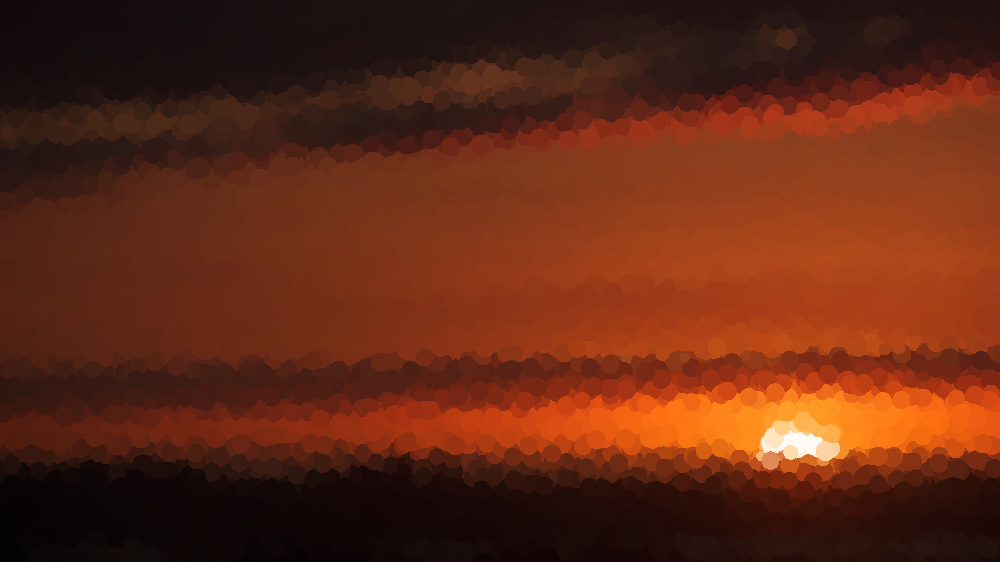

In [19]:
display_point = pointillize(location='images_out_pile_mini/', debug = True)
display_point.display(original=True)

<center> <h1>-------------------- Working section below  ---------------------</h1> </center>

# Notes and To Do's
* Look into reading in movies, and saving gifs as movies
* Consider making radius for complexity calculation dynamic based on max radius, need to test this
* Clean up debug output for the gif batch case (minor)
* Make display() method work for gifs, and implement for the pointillizePile class

# Documentation

In [16]:
# Help on method
help(pointillize.plotRandomPointsComplexity)

Help on function plotRandomPointsComplexity in module __main__:

plotRandomPointsComplexity(self, n, constant, power)
    plots random points over image, where constant is
    the portion of the width for the max size of the bubble,
    and power pushes the distribution towards smaller bubbles



In [21]:
# Print attributes
display_point.print_attributes()

filenames :  ['images_out_pile_mini/IMG_0093.jpg - no border.png', 'images_out_pile_mini/IMG_0116.jpg - no border.png', 'images_out_pile_mini/IMG_1261.jpg - no border.png']
images :  [<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2049x1152 at 0x11D31C3B1D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=4032x2268 at 0x11D31C3B860>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=5184x2916 at 0x11D31C3B7B8>]
arrays : 3  numpy array(s)   
border :  100
outs :  [<PIL.Image.Image image mode=RGBA size=2249x1352 at 0x11D31C3B588>, <PIL.Image.Image image mode=RGBA size=4232x2468 at 0x11D31C3B898>, <PIL.Image.Image image mode=RGBA size=5384x3116 at 0x11D31C3BB38>]
debug :  True
params :  {'complexity_radius': 10}


In [18]:
# Help on module
import pointillism
help(pointillism)

Help on module pointillism:

NAME
    pointillism - This module contains classes that help create pointillized images.

CLASSES
    builtins.object
        pointillize
            pointillizeStack
                pointillizePile
    
    class pointillize(builtins.object)
     |  Base class for pointillzation project
     |  
     |  Methods defined here:
     |  
     |  __init__(self, *args, **kwargs)
     |      Initiialize with image or directory
     |  
     |  crop_Y(self, aspect, resize)
     |      Crops and resizes in the height dimension to match aspect ratio
     |  
     |  display(self, **kwargs)
     |      Displays browser-size version of outputs, or original images
     |      if original=True
     |  
     |  plotRandomPoints(self, n, constant, power)
     |      Plots n random points over image, where constant is the portion
     |      of the image width for the max size of the bubble, and power > 1
     |      pushing the distribution towards smaller bubbles for in